In [1]:
import numpy as np 
import pandas as pd

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

## alternate font/graph format
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
plt.rc('font', weight='heavy')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')
plt.rc('axes', labelsize='x-large')

In [2]:
# files = ['./real_world_results_meps_19_10_runs_TCP_3_40.csv', 'real_world_results_meps_19_10_runs_CQR_3_40.csv', 'real_world_results_meps_19_10_runs_QR-RF_3_40.csv']
# files = ['./real_world_results_meps_19_10_runs_CQR_8_40.csv', 'real_world_results_meps_19_10_runs_TCP_8_40.csv', 'real_world_results_meps_19_10_runs_CP_8_40.csv']
# files = ['./real_world_results_meps_19_10_runs_CQR_10_40.csv', 'real_world_results_meps_19_10_runs_TCP_10_40.csv', \
#     'real_world_results_meps_19_10_runs_QR-RF_10_40.csv', 'subgroup_real_world_results_meps_19_10_runs_TCP-quantile_10_40.csv']
# files = ['./subgroup_real_world_results_meps_21_10_runs_TCP_10_40.csv','./subgroup_real_world_results_meps_21_10_runs_QR-RF_10_40.csv','./subgroup_real_world_results_meps_21_10_runs_CQR_10_40.csv']
# files = ['./subgroup_real_world_results_meps_21_10_runs_CP_10_40.csv']
# files = ['./TABLE_real_world_results_bio_10_runs_TCP_8_40.csv', './TABLE_real_world_results_bio_10_runs_CP_8_40.csv', './TABLE_real_world_results_bio_10_runs_QR-RF_8_40.csv']
# files = ['./TABLE_real_world_results_facebook_1_10_runs_TCP_8_40.csv', './TABLE_real_world_results_facebook_1_10_runs_CP_8_40.csv', './TABLE_real_world_results_facebook_1_10_runs_QR-RF_8_40.csv']
# files = ['./TABLE_real_world_results_facebook_2_10_runs_TCP_8_40.csv', './TABLE_real_world_results_facebook_2_10_runs_CP_8_40.csv', './TABLE_real_world_results_facebook_2_10_runs_QR-RF_8_40.csv']
# files = ['./GRAD_TABLE_real_world_results_bio_10_runs_CP_8_40.csv', './GRAD_TABLE_real_world_results_bio_10_runs_TCP_8_40.csv', './GRAD_TABLE_real_world_results_bio_10_runs_QR-RF_8_40.csv']
# files = ['./GRAD_TABLE_real_world_results_facebook_1_10_runs_CP_8_40.csv', './GRAD_TABLE_real_world_results_facebook_1_10_runs_TCP_8_40.csv', './GRAD_TABLE_real_world_results_facebook_1_10_runs_QR-RF_8_40.csv']
files = ['./GRAD_TABLE_real_world_results_facebook_2_10_runs_CP_8_40.csv', './GRAD_TABLE_real_world_results_facebook_2_10_runs_TCP_8_40.csv', './GRAD_TABLE_real_world_results_facebook_2_10_runs_QR-RF_8_40.csv']
dfs = []
for f in files: 
    dfs.append(pd.read_csv(f))

In [3]:
full_df = pd.concat([dfs[0],dfs[1],dfs[2]], ignore_index=True, axis=0)
methods = np.unique(full_df['model'].values)

final_results = []
for method in methods: 
    sub = full_df[full_df['model'] == method]
    sub['marginal_coverage'].mean()
    # print(sub['marginal_coverage'])
    
    # display(sub)
    x_ = [ np.nanmin(np.fromstring(x_str.strip('[]'), sep=',')) for x_str in sub['coverage_subgroups'].values ]
    result = {
        'model': method, 
        'mean_marginal_coverage': sub['marginal_coverage'].mean(), 
        'std_marginal_coverage': sub['marginal_coverage'].std(), 
        'mean_average_length': sub['average_length'].mean(),
        'std_average_length': sub['average_length'].std(),
        # 'mean_subgroup_coverage': sub['subgroup_coverage_metric2'].mean()
        'worst_subgroup_coverage': np.nanmean(x_)
    }
    final_results.append(result)

F = pd.DataFrame(final_results)
display(F)

,model,mean_marginal_coverage,std_marginal_coverage,mean_average_length,std_average_length,worst_subgroup_coverage
0,CP,0.897877,0.003872,1.387752,0.009481,0.824124
1,CQR,0.897762,0.003776,0.826391,0.082499,0.872745
2,CondHist,0.892375,0.005024,0.637717,0.009130,0.694392
3,LACP,0.899393,0.004624,0.687610,0.012823,0.836055
4,QR-NN,0.789907,0.022084,0.504742,0.018221,0.669902
5,QR-RF,0.917808,0.026369,0.805109,0.093166,0.858117
6,TCP,0.887658,0.004057,1.356957,0.013289,0.874327
7,TCP-quantile,0.887107,0.004608,1.349082,0.007599,0.869427


In [4]:
full_df

,exp_num,dataset,model,marginal_coverage,average_length,subgroup_coverage_metric2,coverage_subgroups,q_lower,q_upper,test_subgroup_idxs,y_resid_test
0,0,facebook_2,CP,0.896286,1.394272,0.881024,"[0.9258545979778526, 0.9174793698424606, 0.843...","[-0.6971362392040128, -0.6971362392040128, -0....","[0.6971362392040128, 0.6971362392040128, 0.697...","[array([ 1, 3, 4, ..., 12133, 12162...","[0.028595584416446496, 0.014898963389897824, 0..."
1,0,facebook_2,LACP,0.898664,0.690378,0.913135,"[0.9162253249879634, 0.9074768692173043, 0.881...","[-0.03557632186878101, -0.12153015861776818, -...","[0.7612547065239271, 0.35656631896156155, 0.68...","[array([ 1, 3, 4, ..., 12133, 12162...","[0.028595584416446496, 0.014898963389897824, 0..."
2,0,facebook_2,CondHist,0.887923,0.633087,0.852499,"[0.9162253249879634, 0.9144786196549137, 0.681...","[-0.11055276381909529, -0.11055276381909529, 0...","[0.5829145728643215, 0.12060301507537696, 0.81...","[array([ 1, 3, 4, ..., 12133, 12162...","[0.028595584416446496, 0.014898963389897824, 0..."
3,1,facebook_2,CP,0.892187,1.378673,0.858639,"[0.8483412322274881, 0.9271969211032713, 0.8, ...","[-0.6893364654634225, -0.6893364654634225, -0....","[0.6893364654634225, 0.6893364654634225, 0.689...","[array([ 3, 7, 14, ..., 12158, 12168...","[0.848654553264773, 0.16129311714995787, 0.007..."
4,1,facebook_2,LACP,0.890629,0.665839,0.874126,"[0.8841495523959979, 0.8980115458627325, 0.823...","[-0.02261969681374215, -0.04004570836265281, -...","[0.7697374632464735, 0.825455794582781, 0.2738...","[array([ 3, 7, 14, ..., 12158, 12168...","[0.848654553264773, 0.16129311714995787, 0.007..."
...,...,...,...,...,...,...,...,...,...,...,...
63,7,facebook_2,QR-NN,0.769615,0.479850,0.778995,"[0.7502102607232969, 0.7700640078778926, 0.794...","[0.030031623, 0.10176831, 0.020484025, 0.07562...","[0.25444642, 0.7190896, 0.24061215, 0.61448705...","[array([ 0, 29, 32, ..., 12175, 12180...","[0.04626735857386477, 0.27642650839446226, 0.1..."
64,8,facebook_2,QR-RF,0.941625,0.891792,0.948809,"[0.9490822972172883, 0.9342359767891683, 0.961...","[0.01557709023683593, 0.013294233940541744, 0....","[0.8352625558773681, 0.8404330844872727, 0.980...","[array([ 3, 4, 6, ..., 12186, 12188...","[0.029488998387614762, 0.01962404004872309, 0...."
65,8,facebook_2,QR-NN,0.805854,0.539915,0.757401,"[0.8087625814091178, 0.8201160541586073, 0.738...","[0.018939544, 0.02590806, 0.048070714, 0.04759...","[0.27771935, 0.3247454, 0.78408664, 0.48807847...","[array([ 3, 4, 6, ..., 12186, 12188...","[0.029488998387614762, 0.01962404004872309, 0...."
66,9,facebook_2,QR-RF,0.941625,0.891792,0.948809,"[0.9490822972172883, 0.9342359767891683, 0.961...","[0.01557709023683593, 0.013294233940541744, 0....","[0.8352625558773681, 0.8404330844872727, 0.980...","[array([ 3, 4, 6, ..., 12186, 12188...","[0.029488998387614762, 0.01962404004872309, 0...."


## Plotting Coverage for each Subgroup (DEPRECATED)

In [31]:
import os 
path = './subgroup_ids_10_meps_21'
files = [os.path.join(path, elem) for elem in os.listdir(path)]
print(files)

cluster_subgroup_sizes = []
idxs_per_run = []

for i in range(10): 
    f = files[i]
    ts = np.load(f,allow_pickle=True)
    test_group_idxs = list(ts['arr_0'])
    sizes = [len(x) for x in test_group_idxs]
    cluster_subgroup_sizes.append(sizes)
    idxs_per_run.append(test_group_idxs)

print(np.array(cluster_subgroup_sizes))
sorted_clusters = np.argsort(np.mean(cluster_subgroup_sizes,axis=0))[::-1]


['./subgroup_ids_10_meps_21/test_subgroup_idxs_0_10_clusters_meps_21.npz', './subgroup_ids_10_meps_21/test_subgroup_idxs_1_10_clusters_meps_21.npz', './subgroup_ids_10_meps_21/test_subgroup_idxs_2_10_clusters_meps_21.npz', './subgroup_ids_10_meps_21/test_subgroup_idxs_3_10_clusters_meps_21.npz', './subgroup_ids_10_meps_21/test_subgroup_idxs_4_10_clusters_meps_21.npz', './subgroup_ids_10_meps_21/test_subgroup_idxs_5_10_clusters_meps_21.npz', './subgroup_ids_10_meps_21/test_subgroup_idxs_6_10_clusters_meps_21.npz', './subgroup_ids_10_meps_21/test_subgroup_idxs_7_10_clusters_meps_21.npz', './subgroup_ids_10_meps_21/test_subgroup_idxs_8_10_clusters_meps_21.npz', './subgroup_ids_10_meps_21/test_subgroup_idxs_9_10_clusters_meps_21.npz']
[[136 236 270  47   7 546 188 131 482 306]
 [  6 629  91 203 140 255 298  57 191 479]
 [ 51 221 489 322   4 256 123 106 182 595]
 [603 211 190 295 283  39   3 584 134   7]
 [599 286   6 263  30 185 743  44  69 124]
 [397 254 542  39 116 323 271  58   7 342]
 

In [32]:
worst_results = []
num_runs = 10
for method in methods:
    worst_x = []
    for run in range(num_runs):
        x_str = full_df[(full_df['model'] == method) & (full_df['exp_num'] == run)]['coverage_subgroups'].values[0]
        x = np.fromstring(x_str.strip("[]"), sep=',')
        print(x)
        worst_x.append(np.nanmin(x)) 
    result = {
        'model': method, 
        'worst_coverage': np.mean(worst_x)
    }
    worst_results.append(result)

W = pd.DataFrame(worst_results)
display(W)

[0.97058824 0.93220339 0.95185185 0.9787234  0.42857143 0.99450549
 0.9893617  0.51145038 0.98547718 0.98039216]
[0.5        0.99205087 1.         0.99507389 0.50714286 0.95294118
 0.98657718 1.         0.97905759 0.98538622]
[1.         0.95927602 0.98568507 0.98757764 0.75       0.9609375
 0.53658537 0.99056604 0.98351648 0.98823529]
[0.98839138 0.95734597 0.98947368 0.92881356 0.98586572 0.97435897
 1.         0.99315068 0.55970149 0.28571429]
[0.98330551 0.98951049 0.83333333 0.91634981 0.96666667 0.98378378
 0.98250336 1.         0.75362319 0.52419355]
[0.97732997 0.99212598 0.98708487 1.         0.54310345 0.9876161
 0.95940959 0.75862069 0.57142857 0.98830409]
[0.97799511 0.98268398 0.94863014 0.99636364 0.73611111 0.5
 0.4        0.98895028 0.95864662 1.        ]
[0.99306759 0.98580122 0.55769231 0.92882562 0.96666667 0.97492163
 0.2        0.95789474 0.97619048 0.96987952]
[0.52173913 0.94936709 0.98892405 0.97435897 0.98245614 0.99186992
 0.75       0.99038462 0.97560976 0.95

,model,worst_coverage
0,CP,0.446165
1,LACP,0.265389
2,TCP,0.811678
3,TCP-quantile,0.887104


In [29]:
subgroup_results = []
num_runs = 10 
num_clusters = 10 

# for run in range(num_runs): 
for method in methods: 
    cov_all = full_df[(full_df['model'] == method)]['coverage_subgroups'].values
    for c in range(num_clusters): 
        cluster_results = []
        for elem in cov_all: 
            l = np.fromstring(elem.strip('[]'), sep=',')
            cluster_results.append(l[c])
        result = {
            'model': method, 
            'cluster': c,
            'mean_coverage': np.nanmean(cluster_results),
            'std_coverage': np.nanstd(cluster_results)
        }
        subgroup_results.append(result)

SG = pd.DataFrame(subgroup_results)
display(SG)

,model,cluster,mean_coverage,std_coverage
0,CP,0,0.846313,0.187918
1,CP,1,0.981930,0.013878
2,CP,2,0.969229,0.024879
3,CP,3,0.987915,0.018695
4,CP,4,0.814252,0.246382
...,...,...,...,...
65,TCP,5,0.848433,0.094744
66,TCP,6,0.912332,0.037371
67,TCP,7,0.913497,0.046887
68,TCP,8,0.855457,0.133609


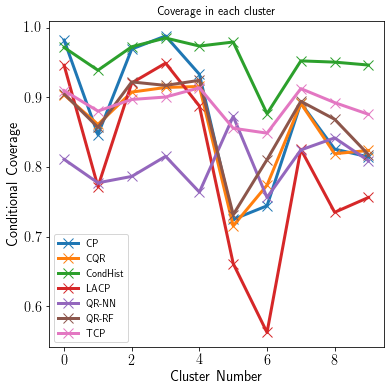

In [38]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

for method in methods: 
    x = SG[SG['model'] == method]['cluster'].values
    y = SG[SG['model'] == method]['mean_coverage'].values
    err = SG[SG['model'] == method]['std_coverage'].values
    y_s = y[sorted_clusters]
    err_s = err[sorted_clusters]

    ax.plot(x,y_s,marker='x',ms=10, linewidth=3, linestyle='-', label=f'{method}')
    # ax.fill_between(x,y_s-err_s,y_s+err_s,alpha=0.1)
ax.set_title('Coverage in each cluster')
ax.set_xlabel('Cluster Number')
ax.set_ylabel('Conditional Coverage')
ax.legend()


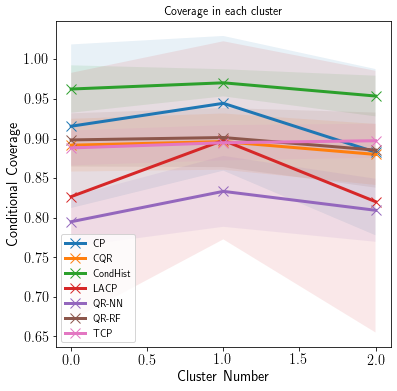

In [10]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

for method in methods: 
    x = SG[SG['model'] == method]['cluster']
    y = SG[SG['model'] == method]['mean_coverage']
    err = SG[SG['model'] == method]['std_coverage']
    ax.plot(x,y,marker='x',ms=10, linewidth=3, linestyle='-', label=f'{method}')
    ax.fill_between(x,y-err,y+err,alpha=0.1)
ax.set_title('Coverage in each cluster')
ax.set_xlabel('Cluster Number')
ax.set_ylabel('Conditional Coverage')
ax.legend()


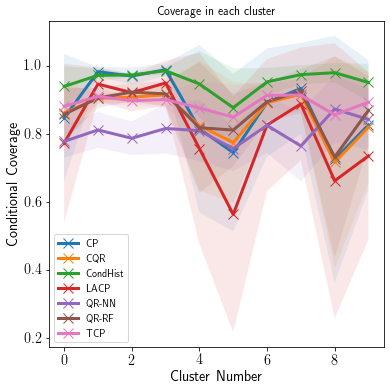

In [23]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

for method in methods:
    x = SG[SG['model'] == method]['cluster']
    y = SG[SG['model'] == method]['mean_coverage']
    err = SG[SG['model'] == method]['std_coverage']
    ax.plot(x,y,marker='x',ms=10, linewidth=3, linestyle='-', label=f'{method}')
    ax.fill_between(x,y-err,y+err,alpha=0.1)
ax.set_title('Coverage in each cluster')
ax.set_xlabel('Cluster Number')
ax.set_ylabel('Conditional Coverage')
ax.legend()


## Plotting Efficiency vs Cluster Number

In [42]:
files = [
    './subgroup_real_world_results_meps_19_10_runs_TCP_2_40.csv',
    './subgroup_real_world_results_meps_19_10_runs_TCP_4_40.csv',
    './subgroup_real_world_results_meps_19_10_runs_TCP_6_40.csv',
    './subgroup_real_world_results_meps_19_10_runs_TCP_8_40.csv',
    './subgroup_real_world_results_meps_19_10_runs_TCP_10_40.csv'
]

average_lengths = []
std_lengths = []
average_coverages = []
std_coverages = []
worst_case_subgroup = []
std_worst_case_subgroup = []
num_clusters = [2,4,6,8,10]
for f in files: 
    df = pd.read_csv(f)
    average_lengths.append(df['average_length'].mean()) 
    std_lengths.append(df['average_length'].std()) 
    average_coverages.append(df['marginal_coverage'].mean())
    std_coverages.append(df['marginal_coverage'].std())
    x_ = [ np.nanmin(np.fromstring(x_str.strip('[]'), sep=',')) for x_str in df['coverage_subgroups'].values ]
    worst_case_subgroup.append(np.mean(x_))    
    std_worst_case_subgroup.append(np.std(x_))

print(worst_case_subgroup)
print(std_worst_case_subgroup)

[0.8891082023691107, 0.7930333275274453, 0.7589707262338192, 0.7246321839080461, 0.7318259982512387]
[0.0150359294174364, 0.10225865456766756, 0.09816379004712714, 0.09115575995149469, 0.10065647712948868]


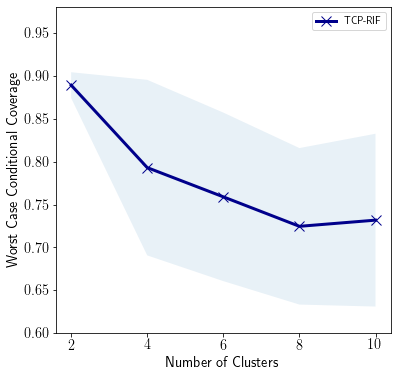

In [51]:
x = np.array(num_clusters)
y = np.array(worst_case_subgroup)
err = np.array(std_worst_case_subgroup)
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(x,y,marker='x',ms=10, linewidth=3, linestyle='-', color='darkblue', label=f'TCP-RIF')
ax.fill_between(x,y-err,y+err,alpha=0.1)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Worst Case Conditional Coverage')
ax.set_ylim(0.6,0.98)
ax.legend()
fig.savefig('./plots/plot_1sup.pdf',bbox_inches='tight')

## Plot 2 (Conditional Coverage + Efficiency in each Cluster) + Plot 3 (AUC for different thresholds of the model error)

In [2]:
import ast
from scipy.stats import pearsonr

# files = ['./FIGS_real_world_results_meps_19_10_runs_CondHist_10_40.csv', 
#         './FIGS_real_world_results_meps_19_10_runs_CP_10_40.csv',
#         './FIGS_real_world_results_meps_19_10_runs_CQR_10_40.csv',
#         './FIGS_real_world_results_meps_19_10_runs_LACP_10_40.csv',
#         './FIGS_real_world_results_meps_19_10_runs_QR-NN_10_40.csv',
#         './FIGS_real_world_results_meps_19_10_runs_QR-RF_10_40.csv',
#         './FIGS_real_world_results_meps_19_10_runs_TCP_10_40.csv',
#         './FIGS_real_world_results_meps_19_10_runs_TCP-quantile_10_40.csv']
# files = [
#     './GRAD_FIGS_real_world_results_facebook_1_10_runs_CP_8_40.csv', 
#     './GRAD_FIGS_real_world_results_facebook_1_10_runs_TCP_8_40.csv',
#     './GRAD_FIGS_real_world_results_facebook_1_10_runs_QR-RF_8_40.csv'
# ]
files = [
    './GRAD_FIGS_real_world_results_meps_20_10_runs_CP_8_40.csv',
    './GRAD_FIGS_real_world_results_meps_20_10_runs_QR-RF_8_40.csv', 
    './GRAD_FIGS_real_world_results_meps_20_10_runs_TCP_8_40.csv'
]
dfs = [pd.read_csv(f) for f in files]
full_df_FIGS = pd.concat(dfs, ignore_index=True, axis=0)

num_clusters = 8
uncertainty_subgroup = []
# subgroup_file = './FIGS_test_subgroup_idxs_0_10_clusters_meps_19.npz'
subgroup_file = './FIGS_test_subgroup_idxs_8_clusters_meps_20.npz'
ts = np.load(subgroup_file, allow_pickle=True)
test_group_idxs = list(ts['arr_0'])
sizes = [len(x) for x in test_group_idxs]
# y_resid_test = np.load('./FIGS_y_resid_test.npy')
# X_test       = np.load('./FIGS_X_test.npy')
# X_train      = np.load('./FIGS_X_train.npy')
y_resid_test = np.load('./GRAD_TABLE_8_clusters_meps_20_y_resid_test.npy')
X_test       = np.load('./GRAD_TABLE_8_clusters_meps_20_X_test.npy')
X_train      = np.load('./GRAD_TABLE_8_clusters_meps_20_X_train.npy')

assert len(test_group_idxs) == num_clusters
for c in range(num_clusters): 
    sg = test_group_idxs[c] 
    uncertainty_subgroup.append(np.mean(y_resid_test[sg])) 

sorted_uncertainty = np.sort(uncertainty_subgroup)
sorted_clusters    = np.argsort(uncertainty_subgroup)
print(uncertainty_subgroup)
print(sorted_uncertainty)
print(sorted_clusters)
print(np.mean(np.array(sizes)[sorted_clusters]))

[0.18238041295015975, 0.14306976927928347, 2.3868033329853886, 0.5787130167710798, 0.12885065398106016, 0.11765284148825593, 0.15405364126128437, 1.3237985782774553]
[0.11765284 0.12885065 0.14306977 0.15405364 0.18238041 0.57871302
 1.32379858 2.38680333]
[5 4 1 6 0 3 7 2]
329.0


In [3]:
# fit new k means model 
from sklearn.cluster import KMeans
num_new_clusters = 50
km_new = KMeans(n_clusters=num_new_clusters, random_state=10)
print('fitting..')
km_new.fit(X_train)

test_new_clusters = km_new.predict(X_test)

uncertainty_subgroup_new = []
for c in range(num_new_clusters): 
    idxs = np.where(test_new_clusters == c)[0]
    uncertainty_subgroup_new.append(np.mean(y_resid_test[idxs])) 
sorted_uncertainty_new = np.sort(uncertainty_subgroup_new)
sorted_clusters_new    = np.argsort(uncertainty_subgroup_new)


fitting..


In [4]:
print(uncertainty_subgroup_new)
print(sorted_uncertainty_new)
print(sorted_clusters_new)

[0.19507174747893047, 0.2228021140702641, 2.3868033329853886, 0.12202403262811586, 0.08181050487231807, 0.1310856155756992, 0.10437627505512312, 0.43127778607441597, 0.36765533302395004, 0.330796042129613, 0.114410447743011, 0.07843510869682752, 0.1610373424732066, 0.8285946736753809, 0.20215179116579046, 0.13656885148380868, 0.3541348104054538, 0.09962864792386772, 1.9227294312619927, 0.3282979502625404, 0.10600727152004366, 0.3572201073136251, 0.18470095312602916, 0.12643486447678107, 0.0835170230601966, 0.07663064147784145, 0.3355884858734505, 2.78167145027746, 0.3863644548183329, 0.2787560242535453, 0.19052398572642418, 1.1802460833719939, 1.3655036983413, 1.4273896006121056, 0.657926060101711, 0.28254152997913246, 0.14266382111495454, 0.7973500159161854, 0.33096754429240155, 0.15188890279377057, 0.11320156970890476, 1.7207907996109997, 0.15618192176979126, 0.8044122043760784, 0.8878857932234682, 0.8930656844241788, 0.8391318497366175, 0.6081637972971481, 0.1292761591041795, 0.5043

In [5]:
from sklearn.neighbors import KNeighborsRegressor
methods = np.unique(full_df_FIGS['model'].values)
num_runs = 10

method_results = {}
thresholds = np.linspace(0.1,13,10)
for method in methods: 
    coverage = []
    efficiency = []
    model_errors = []
    for c in sorted_clusters: 
        sub = full_df_FIGS[full_df_FIGS['model'] == method]
        
        # for run in range(num_runs): 
        x_ = [ np.fromstring(x_str.strip('[]'), sep=',')[c] for x_str in sub['coverage_subgroups'].values ]
        q_upper = np.array(ast.literal_eval(sub['q_upper'].values[0]))
        q_lower = np.array(ast.literal_eval(sub['q_lower'].values[0]))
        sg = test_group_idxs[c]
        efficiency.append(np.mean(q_upper[sg] - q_lower[sg]))
        coverage.append(np.mean(x_)) 
        model_errors.append(np.mean(y_resid_test[sg]))

    efficiency_granular = []
    model_errors_granular = []
    sub = full_df_FIGS[full_df_FIGS['model'] == method]
    q_upper = np.array(ast.literal_eval(sub['q_upper'].values[0]))
    q_lower = np.array(ast.literal_eval(sub['q_lower'].values[0]))
    for c in sorted_clusters_new: 
        idxs = np.where(test_new_clusters == c)[0]
        if len(idxs) == 0: 
            efficiency_granular.append(np.nan)
            model_errors_granular.append(np.nan)
        else: 
            efficiency_granular.append(np.mean(q_upper[idxs] - q_lower[idxs]))
            model_errors_granular.append(np.mean(y_resid_test[idxs]))
    print(len(model_errors_granular))
    method_results[method] = (coverage, efficiency, model_errors, efficiency_granular, model_errors_granular)

# print(method_results)


50
50
50
50
50
50
50
50


CP
CQR
LACP
QR-RF
TCP-RIF


Text(0, 0.5, 'Average Interval Length')

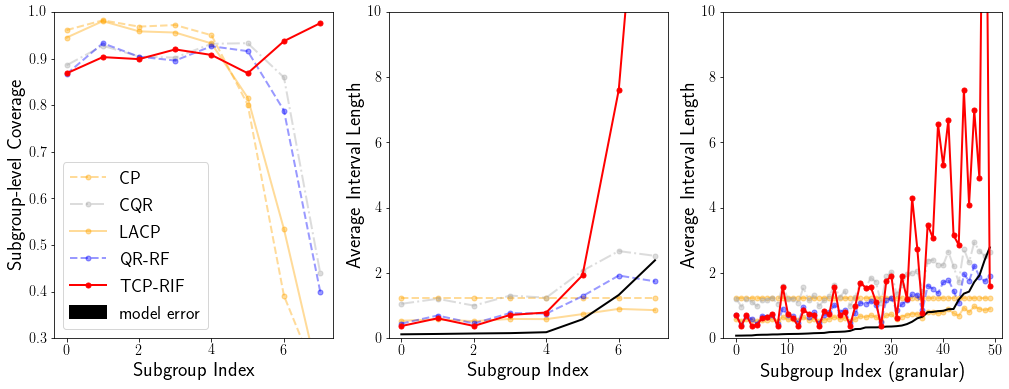

In [9]:
import matplotlib.patches as mpatches
fig, axlist = plt.subplots(1,3,figsize=(17,6))
ax = axlist.ravel()

styles = {
    'QR-RF': ('blue','--'),
    # 'QR-NN': ('blue','-'),
    'TCP-RIF': ('red','-'), 
    # 'TCP-quantile': ('red','--'), 
    'LACP': ('orange','-'), 
    'CP': ('orange','--'), 
    'CQR': ('darkgrey','-.'), 
    'CCH': ('darkgrey',':'), 
    'model-error': ('black', '-')
}
for method in methods: 
    coverage, efficiency, me, eff_granular, me_gran = method_results[method]
    if method == 'CondHist': 
        method = 'CCH'
        continue
    if method == 'TCP': 
        method = 'TCP-RIF'
    if method not in styles: continue
    x = np.arange(len(coverage))
    x_new = np.arange(len(eff_granular)) 
    print(method)

    if method == 'TCP-RIF': 
        s = styles['model-error'][1]
        c = styles['model-error'][0]
        ax[1].plot(x,me,linewidth=2,linestyle=s, color=c, label=f'model-error')
        ax[2].plot(x_new,me_gran,linewidth=2,linestyle=s, color=c, label=f'model-error')
    if 'TCP' not in method:    
        ax[0].plot(x,coverage,marker='.',ms=10, linewidth=2, linestyle=styles[method][1], color=styles[method][0], label=f'{method}', alpha=0.4)
        ax[1].plot(x,efficiency,marker='.',ms=10, linewidth=2, linestyle=styles[method][1], color=styles[method][0], label=f'{method}', alpha=0.4)
        ax[2].plot(x_new,eff_granular,marker='.',ms=10, linewidth=2, linestyle=styles[method][1], color=styles[method][0], label=f'{method}', alpha=0.4)
    else: 
        ax[0].plot(x,coverage,marker='.',ms=10, linewidth=2, linestyle=styles[method][1], color=styles[method][0], label=f'{method}')
        ax[1].plot(x,efficiency,marker='.',ms=10, linewidth=2, linestyle=styles[method][1], color=styles[method][0], label=f'{method}')
        ax[2].plot(x_new,eff_granular,marker='.',ms=10, linewidth=2, linestyle=styles[method][1], color=styles[method][0], label=f'{method}')
    # ax[0].fill_between(x,y-err,y+err,alpha=0.1)
ax[0].set_xlabel('Subgroup Index', fontsize=20)
ax[0].set_ylabel('Subgroup-level Coverage', fontsize=20)
ax[0].set_ylim(0.3,1.0)
ax[1].set_ylim(0.,10.)
ax[2].set_ylim(0.,10.)
empty_patch = mpatches.Patch(color='black', linewidth=2, linestyle='-', label='model error') 
handles, labels = ax[0].get_legend_handles_labels()
handles.append(empty_patch)
ax[0].legend(handles=handles, fontsize=18)
# ax[1].legend(fontsize=18)

ax[1].set_xlabel('Subgroup Index', fontsize=20)
ax[2].set_xlabel('Subgroup Index (granular)', fontsize=20)
ax[1].set_ylabel('Average Interval Length', fontsize=20)
ax[2].set_ylabel('Average Interval Length', fontsize=20)

# ax[4].set_xlabel('Subgroup Index', fontsize=20)
# ax[5].set_xlabel('Subgroup Index (granular)', fontsize=20)
# ax[4].set_ylabel('Average Model Error', fontsize=20)
# ax[5].set_ylabel('Average Model Error', fontsize=20)


fig.savefig('./plots/meps20_figs.pdf',bbox_inches='tight')

## Plot 3 (AUC for different thresholds of the model error)

In [139]:
import ast
files = ['./FIGS_real_world_results_meps_19_10_runs_CondHist_10_40.csv', 
        './FIGS_real_world_results_meps_19_10_runs_CP_10_40.csv',
        './FIGS_real_world_results_meps_19_10_runs_CQR_10_40.csv',
        './FIGS_real_world_results_meps_19_10_runs_LACP_10_40.csv',
        './FIGS_real_world_results_meps_19_10_runs_QR-NN_10_40.csv',
        './FIGS_real_world_results_meps_19_10_runs_QR-RF_10_40.csv',
        './FIGS_real_world_results_meps_19_10_runs_TCP_10_40.csv',
        './FIGS_real_world_results_meps_19_10_runs_TCP-quantile_10_40.csv']
dfs = [pd.read_csv(f) for f in files]
full_df_FIGS = pd.concat(dfs, ignore_index=True, axis=0)

num_clusters = 10
uncertainty_subgroup = []
subgroup_file = './FIGS_test_subgroup_idxs_0_10_clusters_meps_19.npz'
ts = np.load(subgroup_file, allow_pickle=True)
test_group_idxs = list(ts['arr_0'])
sizes = [len(x) for x in test_group_idxs]
y_resid_test = np.load('./FIGS_y_resid_test.npy')

print(np.min(y_resid_test))
print(np.max(y_resid_test))


2.8653695142710767e-05
13.533927864319251


In [146]:
from sklearn.metrics import roc_auc_score

methods = np.unique(full_df_FIGS['model'].values)
num_runs = 10

method_results = {}
thresholds = np.linspace(0.1,13,20)
for method in methods: 
    
    aucs = []

    for threshold in thresholds: 
        sub = full_df_FIGS[full_df_FIGS['model'] == method]
        q_upper = np.array(ast.literal_eval(sub['q_upper'].values[0]))
        q_lower = np.array(ast.literal_eval(sub['q_lower'].values[0]))
        interval_lengths = q_upper - q_lower 
        y_true = y_resid_test > threshold
        aucs.append(roc_auc_score(y_true, interval_lengths))
    
    method_results[method] = aucs
print(method_results)

{'CP': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'CQR': [0.7678674403003183, 0.8503299261385513, 0.8926124338624338, 0.8920100014927601, 0.8872068017004252, 0.886127072937144, 0.8794340800105104, 0.862444780283655, 0.8575182096698928, 0.827745389946706, 0.8592010199745006, 0.8306628466327107, 0.7966284987277353, 0.7648040254237289, 0.9569191705459161, 0.9572938689217759, 0.9572938689217759, 0.9572938689217759, 0.9699915469146239, 0.9699915469146239], 'CondHist': [0.7130789762914116, 0.8569929901634754, 0.8946406525573193, 0.9019965666517391, 0.9039859964991247, 0.8923962901355915, 0.913206989423898, 0.8982988452297916, 0.8931056870980177, 0.8770860960292242, 0.8886527836804079, 0.874221844934918, 0.8501484308736217, 0.8431408898305085, 0.9688531527719001, 0.9756166314305849, 0.9756166314305849, 0.9756166314305849, 0.9686179205409974, 0.9686179205409974], 'LACP': [0.7559628313278808, 0.8458459498722302, 0.8889969135802469, 0.88